In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import os
import random


from utils.empirical_data import *
from mechanisms.mldp.mldp import *
from mechanisms.k_rr.k_rr_mechanism import *
from mechanisms.mldp.repetitive_optimizer import *
from utils.synthetic_dataset import *
from mechanisms.exponential.exponential_mechanism import *
from utils.simpleinfotheory import *
from utils.normalize_error_matrix import *
from mechanisms.rappor.rappor_mechanism import *

import matplotlib as mpl
import matplotlib.lines as mlines

mpl.rcParams.update({'font.size': 16})

ModuleNotFoundError: No module named 'mechanisms.randomized_response'

## Generate Synthetic Datasets

In [ ]:
from utils.alphabet import *

NUM_ATTRIBUTES = 2
NUM_STATES = [3, 3]
DATASET_SIZE = 6000

priority_dict = {} # {'0': 2, '1': 0.5}

TOTAL_STATES = 1
alphabet_dict = {}
for i in range(NUM_ATTRIBUTES):
    TOTAL_STATES *= NUM_STATES[i]
    alphabet_dict[str(i)] = np.arange(NUM_STATES[i])

ALL_ALPHABET = create_alphabet(attributes_with_alphabet=alphabet_dict)
STRING_ALL_ALPHABET = convert_alphabet_to_string(ALL_ALPHABET)
ATTRIBUTE_LIST = list(alphabet_dict.keys())
# random_dist = np.array([random.randint(1, 5000) for i in range(TOTAL_STATES)])
# random_dist = random_dist/np.sum(random_dist)
random_dist = [0.3, 0.01, 0.01, 0.01, 0.30, 0.01, 0.01, 0.01, 0.34] # [0.2, 0.11, 0.01, 0.01, 0.20, 0.11, 0.01, 0.11, 0.24] # [0.3, 0.01, 0.01, 0.01, 0.30, 0.01, 0.01, 0.01, 0.34]
# random_dist = [0.25, 0.25, 0.25, 0.25] # [0.5, 0.025, 0.025, 0.45]

print("Alphabet ", ALL_ALPHABET)
print("ATTRIBUTE_LIST ", ATTRIBUTE_LIST)

# synthetic_dataset_constructor = Gen_Synthetic_Dataset(no_of_states = TOTAL_STATES, no_of_samples = DATASET_SIZE, alphabet=STRING_ALL_ALPHABET)
# correlated_synthetic_dataset = synthetic_dataset_constructor.gen_custom(distribution=random_dist)

# uniform_synthetic_dataset = synthetic_dataset_constructor.gen_uniform()



## Claculate Error Matrix

In [ ]:
# alphabet_dict = {}
# for i in range(len(ALL_ALPHABET)):
#     alphabet_dict[str(ALL_ALPHABET[i])] = i
# print(alphabet_dict)
# normalize_error_matrix = Normalize_error_matrix(attribute_list=ATTRIBUTE_LIST, alphabet=ALL_ALPHABET, priority_dict=priority_dict, alphabet_dict=alphabet_dict)
# err_matrix = normalize_error_matrix.normalized_error_matrix
# sns.heatmap(err_matrix)
# plt.show()

## Calculate Mutual Information

### Pair-wise information leakage of A: I(A;A')

In [ ]:
def mutual_info_pair(a, b):
    return mutualinformationempirical(xn=a, yn=b)[0]

### Total information leakage of A: I(A;A',B')

In [ ]:
# I(A;A',B') = I(A;A') + I(A;B'|A')

def conditional_mutual_info(a, b, c):
    return conditionalmutualinformationempirical(a, b, c)

def total_info_leakage(A, A_prime, B_prime):
    return  mutual_info_pair(A, A_prime) + conditional_mutual_info(A, B_prime, A_prime)
    # return  mutual_info_pair(A, B_prime) - conditional_mutual_info(A, B_prime, A_prime)

In [ ]:
def mutual_information(a, b):
    processed_a = []
    # print(a)
    # print(b)
    for i in a:
        actual_split = i.split(" ")
        actual = []
        # print(actual_split)
        for j in actual_split:
            # print(i)
            if j != "" :
                actual.append(int(j))
        processed_a.append(np.array(actual))
    processed_a = np.array(processed_a)
    processed_b = []
    
    for i in b:
        actual_split = i.split(" ")
        actual = []
        # print(actual_split)
        for j in actual_split:
            # print(i)
            if j != "" :
                actual.append(int(j))
        processed_b.append(np.array(actual))
    processed_b = np.array(processed_b)

    mi = []
    # print("processed_a", processed_a)
    # print("processed_b", processed_b)
    # for i in range(np.shape(processed_b)[1]):
    #     mi.append(mutual_info_pair(processed_a[:,i], processed_b[:,i]))
    # mi.append(mutual_info_pair(processed_a[:,0], processed_a[:,1]))
    # mi.append(mutual_info_pair(processed_b[:,1], processed_b[:,0]))
    # mi.append(mutual_info_pair(processed_a[:,0], processed_b[:,0]))
    # mi.append(mutual_info_pair(processed_a[:,1], processed_b[:,1]))
    # mi.append(total_info_leakage(processed_a[:,0], processed_b[:,0], processed_b[:,1]))
    mi.append(total_info_leakage(processed_a[:,1], processed_b[:,1], processed_b[:,0]))
    # mi.append(total_info_leakage(processed_a[:,0], processed_b[:,1], processed_b[:,0]))
    return mi
    

## Benchmark Optimal Mechanism

In [49]:
EPS_ARRAY = np.arange(50)*0.25

### Correlated Distribution

E  0.884
E  0.8581666666666666
E  0.833
E  0.7931666666666667
E  0.7455
E  0.6963333333333334
E  0.6476666666666666
E  0.5861666666666666
E  0.515
E  0.46166666666666667
E  0.4085
E  0.3421666666666667
E  0.2795
E  0.23
E  0.18683333333333332
E  0.15333333333333332
E  0.129
E  0.103
E  0.0805
E  0.06616666666666667
E  0.05216666666666667
E  0.041666666666666664
E  0.03266666666666666
E  0.022833333333333334
E  0.019333333333333334
E  0.015333333333333332
E  0.0125
E  0.009166666666666667
Break
E  0.8878333333333334
E  0.8738333333333334
E  0.855
E  0.8395
E  0.8136666666666666
E  0.7973333333333333
E  0.7763333333333333
E  0.745
E  0.7085
E  0.689
E  0.6435
E  0.6263333333333333
E  0.5968333333333333
E  0.564
E  0.5245
E  0.494
E  0.44616666666666666
E  0.42383333333333334
E  0.394
E  0.35783333333333334
E  0.3305
E  0.31033333333333335
E  0.2841666666666667
E  0.2618333333333333
E  0.24183333333333334
E  0.21766666666666667
E  0.20266666666666666
E  0.19616666666666666
E  0.173
E  0.1

/Users/sandarujayawardana/Documents/minimal-data-ldp/.venv/lib/python3.9/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


l2_error  1.5386897640662893
E  0.38333333333333336
1.75
l2_error  1.5517050853215026
E  0.3253333333333333
2.0
l2_error  1.46540107968745
E  0.2856666666666667
2.25
l2_error  1.612040479736774
E  0.23233333333333334
2.5
l2_error  1.6915565470956435
E  0.214
2.75
l2_error  1.6652480550060196
E  0.18833333333333332
3.0
l2_error  1.6976196343485588
E  0.16216666666666665
3.25
l2_error  1.8341111492053694
E  0.13683333333333333
3.5
l2_error  1.8628777723036278
E  0.124
3.75
l2_error  2.01732590934215
E  0.1095
4.0
l2_error  1.9335394004091453
E  0.10083333333333333
4.25
l2_error  2.2459462192287827
E  0.0975
4.5
l2_error  2.067889518647762
E  0.08433333333333333
4.75
l2_error  0.960094399874261
E  0.06883333333333333
5.0
l2_error  0.0070588386652476525
E  0.051333333333333335
5.25
l2_error  0.2652228684784633
E  0.04516666666666667
5.5
l2_error  6.591049189851103e-05
E  0.028833333333333332
E  0.0285
E  0.0185
E  0.0145
E  0.013
E  0.007666666666666666
Break
E  0.8856666666666667
E  0.861

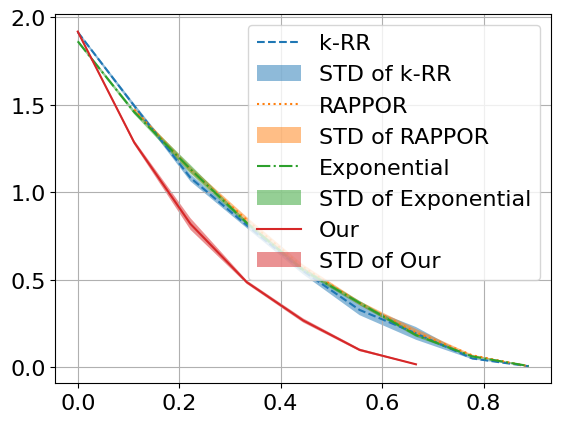

E  0.45116666666666666
E  0.4345833333333333
E  0.41783333333333333
E  0.4025
E  0.37266666666666665
E  0.35108333333333336
E  0.31545833333333334
E  0.28841666666666665
E  0.26308333333333334
E  0.22975
E  0.19941666666666666
E  0.16420833333333335
E  0.143
E  0.11845833333333333
E  0.103125
E  0.08066666666666666
E  0.06116666666666667
E  0.05366666666666667
E  0.04008333333333333
E  0.03308333333333333
E  0.025875
E  0.02075
E  0.017
E  0.013541666666666667
E  0.011625
E  0.0065
Break
E  0.45325
E  0.44695833333333335
E  0.43504166666666666
E  0.42983333333333335
E  0.41804166666666664
E  0.4043333333333333
E  0.39095833333333335
E  0.373625
E  0.3637916666666667
E  0.350875
E  0.32545833333333335
E  0.31375
E  0.2962916666666667
E  0.2809583333333333
E  0.2597083333333333
E  0.24283333333333335
E  0.23075
E  0.21395833333333333
E  0.19841666666666666
E  0.19108333333333333
E  0.167
E  0.15604166666666666
E  0.14679166666666665
E  0.12741666666666668
E  0.11779166666666667
E  0.1130

/Users/sandarujayawardana/Documents/minimal-data-ldp/.venv/lib/python3.9/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


l2_error  1.9744440758103448
E  0.15995833333333334
2.25
l2_error  2.1377795333997094
E  0.13754166666666667
2.5
l2_error  2.1180931463801773
E  0.12325
2.75
l2_error  2.261850302222476
E  0.10083333333333333
3.0
l2_error  2.246959268377499
E  0.08070833333333334
3.25
l2_error  1.8549148658218422
E  0.07516666666666667
3.5
l2_error  1.922547384590409
E  0.06545833333333333
3.75
l2_error  1.9170742305242832
E  0.05558333333333333
4.0
l2_error  1.9085066499077512
E  0.044333333333333336
4.25
l2_error  1.8903137411611506
E  0.03666666666666667
4.5
l2_error  1.8064155821535997
E  0.03266666666666666
4.75
l2_error  1.8625811141276423
E  0.029708333333333333
5.0
l2_error  1.9680308185818853
E  0.023916666666666666
5.25
l2_error  0.6558516817574216
E  0.017541666666666667
5.5
l2_error  0.9625285557679784
E  0.017291666666666667
5.75
l2_error  0.6567650736116026
E  0.011708333333333333
6.0
l2_error  0.5789668094725235
E  0.009833333333333333
Break
E  0.45358333333333334
E  0.4334166666666667
E

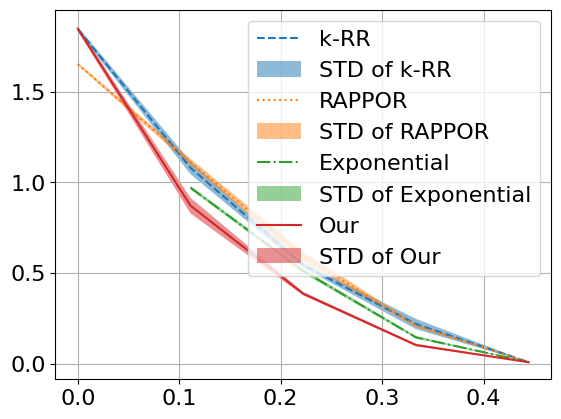

E  0.5140401533158447
E  0.4989950265833693
E  0.47812068969531424
E  0.4536341897146067
E  0.4261230551473312
E  0.3983130897531687
E  0.36750946696188064
E  0.34339572371901744
E  0.2998399943108434
E  0.2652578480353515
E  0.2306038830667297
E  0.19368628215153297
E  0.16187524334278539
E  0.13560829986702433
E  0.11196197533044328
E  0.09174971420609974
E  0.07377699476290873
E  0.05893777209651009
E  0.04789878486857243
E  0.03895675042824743
E  0.029619520368636226
E  0.02195100628706155
E  0.018912115375055896
E  0.0160172179681634
E  0.012730263559300544
E  0.008761957443537971
Break
E  0.5191858820285757
E  0.5091796779908211
E  0.496731593735132
E  0.4834153571321601
E  0.4805862853076172
E  0.46692125693169717
E  0.4485182177820302
E  0.43007282030980887
E  0.41380894225448317
E  0.3929449404105767
E  0.38143340385319524
E  0.3554371073466676
E  0.3416202590284887
E  0.3305890988386362
E  0.30052765563602724
E  0.28501451317154974
E  0.2644648987128932
E  0.2461425726832109


/Users/sandarujayawardana/Documents/minimal-data-ldp/.venv/lib/python3.9/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


l2_error  2.1278909250183293
E  0.14062048579894168
2.5
l2_error  2.0073163484607637
E  0.12917967056602359
2.75
l2_error  2.046693427958327
E  0.1117048688268724
3.0
l2_error  2.069919288768534
E  0.08527893992971133
3.25
l2_error  1.965826792487149
E  0.08147322497692988
3.5
l2_error  2.040536099108116
E  0.0732066370190824
3.75
l2_error  1.8798161210771793
E  0.06359640982863077
4.0
l2_error  2.0127362074746427
E  0.05275838867546725
4.25
l2_error  2.0518993923760194
E  0.04453519284341267
4.5
l2_error  1.957718144831657
E  0.03698548989745956
4.75
l2_error  1.8964818618783084
E  0.03472479127267726
5.0
l2_error  1.9900269148633465
E  0.026810521005721573
5.25
l2_error  1.023380219444208
E  0.02470884801462659
5.5
l2_error  0.2751362194283002
E  0.01819663317192033
5.75
l2_error  0.7634791928717831
E  0.015672612103376355
6.0
l2_error  0.00010105095822793772
E  0.011734709270381394
E  0.008911429862033537
Break
E  0.511954714567496
E  0.5063166280896184
E  0.476524332731553
E  0.460

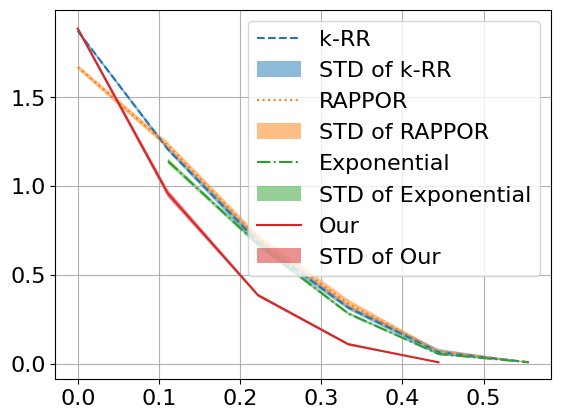

In [51]:
utility_error_function = ["0_1", "l1", "l2"]
line_styles = {"RAPPOR": ":", "k-RR": "--", "Exponential": "-.", "Our": "-"}



for util_err in utility_error_function:
    info_dict_list = []
    synthetic_dataset_constructor = Gen_Synthetic_Dataset(no_of_states = TOTAL_STATES, no_of_samples = DATASET_SIZE, alphabet=STRING_ALL_ALPHABET)
    correlated_synthetic_dataset = synthetic_dataset_constructor.gen_custom(distribution=random_dist)
    for rep in range(10):
        alphabet_dict = {}
        for i in range(len(ALL_ALPHABET)):
            alphabet_dict[str(ALL_ALPHABET[i])] = i
        # print(alphabet_dict)
        normalize_error_matrix = Normalize_error_matrix(attribute_list=ATTRIBUTE_LIST, alphabet=ALL_ALPHABET, priority_dict=priority_dict, alphabet_dict=alphabet_dict, err_type=util_err)
        err_matrix = normalize_error_matrix.normalized_error_matrix
        # sns.heatmap(err_matrix)
        # plt.show()

        exponential_mechanism_without_prior = Exponential_mechanism(prior_dist=random_dist, STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix, only_err_matrix=True)

        exponential_mechanism_with_prior = Exponential_mechanism(prior_dist=random_dist, STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix, only_err_matrix=False)

        random_response_mechanism = Randomized_Response(STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix)

        optimal_random_response_mechanism = Optimized_Randomized_Response(prior_dist = random_dist, STATE_COUNT = TOTAL_STATES, INPUT_ALPHABET = STRING_ALL_ALPHABET, normalized_objective_err_matrix = err_matrix, 
                        TOLERANCE_MARGIN = 0.01, APPROXIMATION = "LINEAR", solver = "SCS", is_kl_div = True, ALPHA=0.01, accelerate_from_rr=True)

        rappor_mechanism = Rappor_mechanism(STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET = STRING_ALL_ALPHABET, prob_f=0.5, prob_p=0.25, prob_q=0.75, collection_count = 10)
        # mechanisms_dict = {"Exp. mechanism without prior": exponential_mechanism_without_prior, "Exp. mechanism with prior": exponential_mechanism_with_prior, "k-RR": random_response_mechanism, "Optimal k-RR": optimal_random_response_mechanism}
        # mechanisms_dict = {"k-RR": random_response_mechanism, "Optimal k-RR": optimal_random_response_mechanism}
        mechanisms_dict = {"k-RR": random_response_mechanism,"RAPPOR": rappor_mechanism, "Exponential": exponential_mechanism_without_prior, "Our": optimal_random_response_mechanism}

        error_dict = {}
        mi_dict = {}
        total_mi_dict = {}

        for key in list(mechanisms_dict.keys()):
            error_dict[key] = []
            mi_dict[key] = []
            total_mi_dict[key] = []

        
            # print(eps)
        for mechanism in list(mechanisms_dict.keys()):
            for eps in EPS_ARRAY:
                __tot_error = 0
                __perturbed_value_list = []
                for entry in correlated_synthetic_dataset:
                    # entry = entry_np_value[0]
                    if mechanism == "RAPPOR":
                        __perturbed_value_list.append(mechanisms_dict[mechanism].gen_random_output(actual_value=entry, eps=eps, prob_f=eps/10, is_eps=True)[0])
                    else:
                        __perturbed_value_list.append(mechanisms_dict[mechanism].gen_random_output(actual_value=entry, eps=eps)[0])
                    # print(entry,__perturbed_value_list[-1])
                    __error = normalize_error_matrix.get_value_error(actual=entry, perturbed=__perturbed_value_list[-1])
                    __tot_error += __error
                error_dict[mechanism].append(__tot_error/len(correlated_synthetic_dataset))
                mi_dict[mechanism].append(mutual_info_pair(correlated_synthetic_dataset, __perturbed_value_list))
                print("E ", error_dict[mechanism][-1])
                if error_dict[mechanism][-1] < 0.01:
                    print("Break")
                    break
                # total_mi_dict[mechanism].append(total_info_leakage(correlated_synthetic_dataset, __perturbed_value_list, ))
                # mi_dict[mechanism].append(mutual_information(correlated_synthetic_dataset, __perturbed_value_list))

                # if mechanism == "Optimal k-RR":
                #     optimal_mechanism = mechanisms_dict[mechanism].get_mechanism(eps=eps)
                    
                    # posterior_prob_distribution = np.zeros(TOTAL_STATES)
                    # posterior_joint_prob = np.zeros((TOTAL_STATES, TOTAL_STATES))
                    # for i in range(TOTAL_STATES):
                    #     posterior_joint_prob[:,i] = np.reshape(optimal_mechanism[:,i] * np.array(random_dist), (4,))
                    #     posterior_prob_distribution[i] = np.sum(optimal_mechanism[:,i] * np.array(random_dist))
                    # print("posterior_prob_distribution ", posterior_prob_distribution)
                    # print("Distance ", np.linalg.norm((random_dist-posterior_prob_distribution), 2))
                    # sns.heatmap(optimal_mechanism)
                    # plt.show()
        # lagends = []
        # for mechanism in list(mechanisms_dict.keys()):
        #     lagends.append(mechanism + " utility_error")
        #     plt.plot(EPS_ARRAY, error_dict[mechanism])
        #     # lagends.append(mechanism + " info_leakage")
        #     # plt.plot(EPS_ARRAY, mi_dict[mechanism])
        #     # lagends.append(mechanism + " total_info_leakage")
        #     # plt.plot(EPS_ARRAY, total_mi_dict[mechanism])
        #     # for mi_ in range(len(mi_dict[mechanism][0])):
        #     plt.plot(EPS_ARRAY, np.array(mi_dict[mechanism]))
        #     #     lagends.append(f"{mechanism}")
        #         # legend.append(f"MI for Optimal, attr:{grouped_attributes_list[i][mi_]}")

        # plt.legend(lagends)
        # plt.xlabel("Privacy Budget (Epsilon)")
        # plt.ylabel("Error (Normalized)")
        # # plt.title(f"{error_cal_type} error between original value and perturbed value for {Attr_list}")
        # plt.show()

        utility_error = np.arange(10)
        
        utility_error = utility_error/np.max(utility_error)

        tolerance = (utility_error[1] - utility_error[0])/2

        info_dict = {}

        for mechanism in list(mechanisms_dict.keys()):
            info_dict[mechanism] = []
            for i in utility_error:
                info_dict[mechanism].append(np.nan)

        for index_1, i in enumerate(utility_error):
            for mechanism in list(mechanisms_dict.keys()):
                acquired_indexes = []
                min_dist = tolerance
                acquired_index = -1
                for index_, j in enumerate(error_dict[mechanism]):
                    if (index_ not in acquired_indexes) and  abs(i-j) <= min_dist:
                        min_dist = abs(i-j)
                        acquired_index = index_
                        info_dict[mechanism][index_1] = (mi_dict[mechanism][index_])
                        # break
                if acquired_index != -1:
                    acquired_indexes.append(acquired_index)
        info_dict_list.append(info_dict)


    fig = plt.figure()
    lagends = []
    for mechanism in list(mechanisms_dict.keys()):
        lagends.append(mechanism)
        lagends.append(f"STD of {mechanism}")
        value_list = []
        for m in range(len(info_dict_list)):
            value_list.append(info_dict_list[m][mechanism])
            print(value_list[-1])
        value_array = np.array(value_list)

        means = np.mean(value_array, axis=0)
        stds = np.std(value_array, axis=0)
        print(means)
        print(stds)
        plt.plot(utility_error, means, linestyle=line_styles[mechanism])
        plt.fill_between(utility_error, means - stds, means + stds, alpha=0.5)

        # plt.plot(utility_error, info_dict[mechanism], linestyle=line_styles[mechanism])
    plt.xlabel("Error (Normalized)") 
    plt.ylabel("Information Leakage (bits)")
    plt.legend(lagends)
    plt.grid(visible=True)
    plt.show()
    fig.savefig(f"{util_err}.pdf", bbox_inches='tight')


In [ ]:
utility_error = np.arange(30)
    
utility_error = utility_error/np.max(utility_error)

tolerance = (utility_error[1] - utility_error[0])/2

info_dict = {}

for mechanism in list(mechanisms_dict.keys()):
    info_dict[mechanism] = []
    for i in utility_error:
        info_dict[mechanism].append(np.nan)

for index_1, i in enumerate(utility_error):
    for mechanism in list(mechanisms_dict.keys()):
        for index_, j in enumerate(error_dict[mechanism]):
            if abs(i-j) < tolerance:
                info_dict[mechanism][index_1] = (mi_dict[mechanism][index_])
                break
fig = plt.figure()
lagends = []
for mechanism in list(mechanisms_dict.keys()):
    lagends.append(mechanism)
    plt.plot(utility_error, info_dict[mechanism], linestyle=line_styles[mechanism])

plt.legend(lagends)
plt.grid(visible=True)
plt.show()
fig.savefig(f"{util_err}.pdf", bbox_inches='tight')


In [ ]:
for mechanism in list(mechanisms_dict.keys()):
    lagends.append(mechanism + " utility_error")
    plt.plot(EPS_ARRAY, error_dict[mechanism])
    # lagends.append(mechanism + " info_leakage")
    # plt.plot(EPS_ARRAY, mi_dict[mechanism])
    # lagends.append(mechanism + " total_info_leakage")
    # plt.plot(EPS_ARRAY, total_mi_dict[mechanism])
    plt.plot(EPS_ARRAY, np.array(mi_dict[mechanism]))
    #     lagends.append(f"{mechanism}")
        # legend.append(f"MI for Optimal, attr:{grouped_attributes_list[i][mi_]}")

plt.legend(lagends)
plt.xlabel("Privacy Budget (Epsilon)")
plt.ylabel("Error (Normalized)")
# plt.title(f"{error_cal_type} error between original value and perturbed value for {Attr_list}")
plt.show()

In [ ]:
error_dict

In [ ]:
utility_error = np.arange(20)
utility_error = utility_error/np.max(utility_error)

tolerance = (utility_error[1] - utility_error[0])/2

info_dict = {}

for mechanism in list(mechanisms_dict.keys()):
    info_dict[mechanism] = []
    for i in utility_error:
        info_dict[mechanism].append(np.nan)

for index_1, i in enumerate(utility_error):
    for mechanism in list(mechanisms_dict.keys()):
        for index_, j in enumerate(error_dict[mechanism]):
            if abs(i-j) < tolerance:
                info_dict[mechanism][index_1] = (mi_dict[mechanism][index_])
                break

lagends = []
for mechanism in list(mechanisms_dict.keys()):
    lagends.append(mechanism + " utility_error")
    plt.plot(utility_error, info_dict[mechanism])

plt.legend(lagends)
plt.grid(visible=True)
plt.show()


In [ ]:
info_dict

In [ ]:
for mechanism in list(mechanisms_dict.keys()):
    lagends.append(mechanism + " utility_error")
    plt.plot(utility_error, info_dict[mechanism])
plt.plot(utility_error, aa)
plt.legend(lagends)
plt.grid(visible=True)
plt.show()

In [ ]:
# aa = info_dict["Optimal k-RR"]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data with some points set to np.nan
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([2, 3, np.nan, 5, np.nan, 6])

# Plotting
plt.plot(x, y)
plt.title('Plot with Skipped Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
